## Exploratory Data Analysis (EDA) notebook

### Here we explore the provided dataset and we analyze some of it's statistical characteristics

In [91]:
import os

import copy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import colorcet as cc

import warnings
warnings.filterwarnings("ignore")

In [92]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取CSV文件
up = pd.read_csv("../dataset/upstream.csv")
mid = pd.read_csv("../dataset/midstream.csv")
down = pd.read_csv("../dataset/downstream.csv")

# 定义函数来拆分数据并保存
def split_and_save_data(df, filename):
    train, test = train_test_split(df, test_size=0.3, random_state=42)
    train.to_csv(f"../dataset/{filename}.csv", index=False)
    test.to_csv(f"../dataset/{filename}_test.csv", index=False)

# 拆分并保存数据
split_and_save_data(up, "upstream")
split_and_save_data(mid, "midstream")
split_and_save_data(down, "downstream")

### Loading datasets as Panda Dataframes from the correct path

In [94]:
dataset_names = ["upstream.csv", "midstream.csv", "downstream.csv"]
data_path = "../dataset"
datasets = [os.path.join(data_path, data_name) for data_name in dataset_names]

In [95]:
dfs = dict()
for data_name, data_path in zip(dataset_names, datasets):
    dfs[data_name] = pd.read_csv(data_path)

In [96]:
elborn = dfs["upstream.csv"]
lescorts = dfs["midstream.csv"]
poblesec = dfs["downstream.csv"]
elborn["time"] = pd.to_datetime(elborn["time"], format="%Y/%m/%d %H:%M").dt.strftime("%Y/%m/%d %H:%M:%S")
lescorts["time"] = pd.to_datetime(lescorts["time"], format="%Y/%m/%d %H:%M").dt.strftime("%Y/%m/%d %H:%M:%S")
poblesec["time"] = pd.to_datetime(poblesec["time"], format="%Y/%m/%d %H:%M").dt.strftime("%Y/%m/%d %H:%M:%S")

In [97]:
print(f"Elborn: {min(elborn['time'])}, {max(elborn['time'])}")
print(f"LesCorts: {min(lescorts['time'])}, {max(lescorts['time'])}")
print(f"PobleSec: {min(poblesec['time'])}, {max(poblesec['time'])}")

Elborn: 2020/11/09 00:00:00, 2023/12/31 20:00:00
LesCorts: 2020/11/09 00:00:00, 2023/12/31 20:00:00
PobleSec: 2020/11/09 00:00:00, 2023/12/31 20:00:00


In [98]:
elborn.set_index("time", inplace=True)
lescorts.set_index("time", inplace=True)
poblesec.set_index("time", inplace=True)

### The size and data form of each individual base station dataset

In [99]:
len(elborn), len(lescorts), len(poblesec)

(4246, 4289, 4272)

In [100]:
elborn.head()

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen
time,,,,,,,,,
2022/02/05 16:00:00,16.19,6.92,7.44,218.83,22.18,3.49,0.772,0.1540,4.136
2022/10/22 20:00:00,26.79,7.31,8.06,134.54,8.64,2.45,0.025,0.0320,1.511
2022/01/10 16:00:00,19.86,7.25,7.66,191.94,16.96,3.02,0.032,0.0542,2.820
2022/10/24 12:00:00,27.15,7.19,8.37,134.19,9.84,2.45,0.025,0.0314,1.299
2023/08/31 00:00:00,29.81,6.18,3.86,96.49,19.15,2.73,0.097,0.0974,2.681


In [101]:
lescorts.head()

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen
time,,,,,,,,,
2022/12/08 12:00:00,19.30,7.32,7.82,188.79,11.48,4.58,0.025,0.083,2.620
2022/10/11 04:00:00,27.81,7.25,6.32,153.20,18.46,4.83,0.058,0.097,1.840
2022/02/21 08:00:00,14.07,7.09,8.49,254.90,24.15,5.59,1.107,0.232,4.731
2022/08/31 08:00:00,31.65,6.82,5.50,135.41,16.68,4.72,0.025,0.113,1.666
2023/06/03 00:00:00,33.12,8.89,9.87,162.99,16.60,7.18,0.065,0.119,1.421


In [102]:
poblesec.head()

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen
time,,,,,,,,,
2023/02/07 08:00:00,18.85,7.43,6.99,207.52,17.63,4.29,0.196,0.056,3.087
2023/08/15 08:00:00,29.34,6.54,5.31,123.27,29.71,4.81,0.181,0.121,1.821
2021/03/06 12:00:00,23.60,7.18,8.16,218.44,9.45,4.39,0.236,0.054,1.808
2023/02/11 08:00:00,20.78,7.20,5.58,197.52,19.19,4.02,0.252,0.079,3.046
2021/06/06 08:00:00,30.79,6.68,2.53,218.89,7.85,5.34,0.316,0.075,1.350


### Up and Down Limits for each dataset

In [103]:
elborn.pH.min(), elborn.DissolvedOxygen.min(),lescorts.pH.min(), lescorts.DissolvedOxygen.min(),poblesec.pH.min(), poblesec.DissolvedOxygen.min(),

(5.88, 2.16, 5.62, 1.12, 5.79, 0.57)

In [104]:
elborn.pH.max(), elborn.DissolvedOxygen.max(),lescorts.pH.max(), lescorts.DissolvedOxygen.max(),poblesec.pH.max(), poblesec.DissolvedOxygen.max(),

(10.14, 20.16, 9.79, 26.63, 9.72, 18.69)

### Correlation Matrices

In [105]:
def cor_matrix(df):
    plt.figure(figsize=(18,8))
    sns.heatmap(df.corr(),annot=True,cmap='Greens',linewidths=0.2)
    plt.show()
    plt.close()

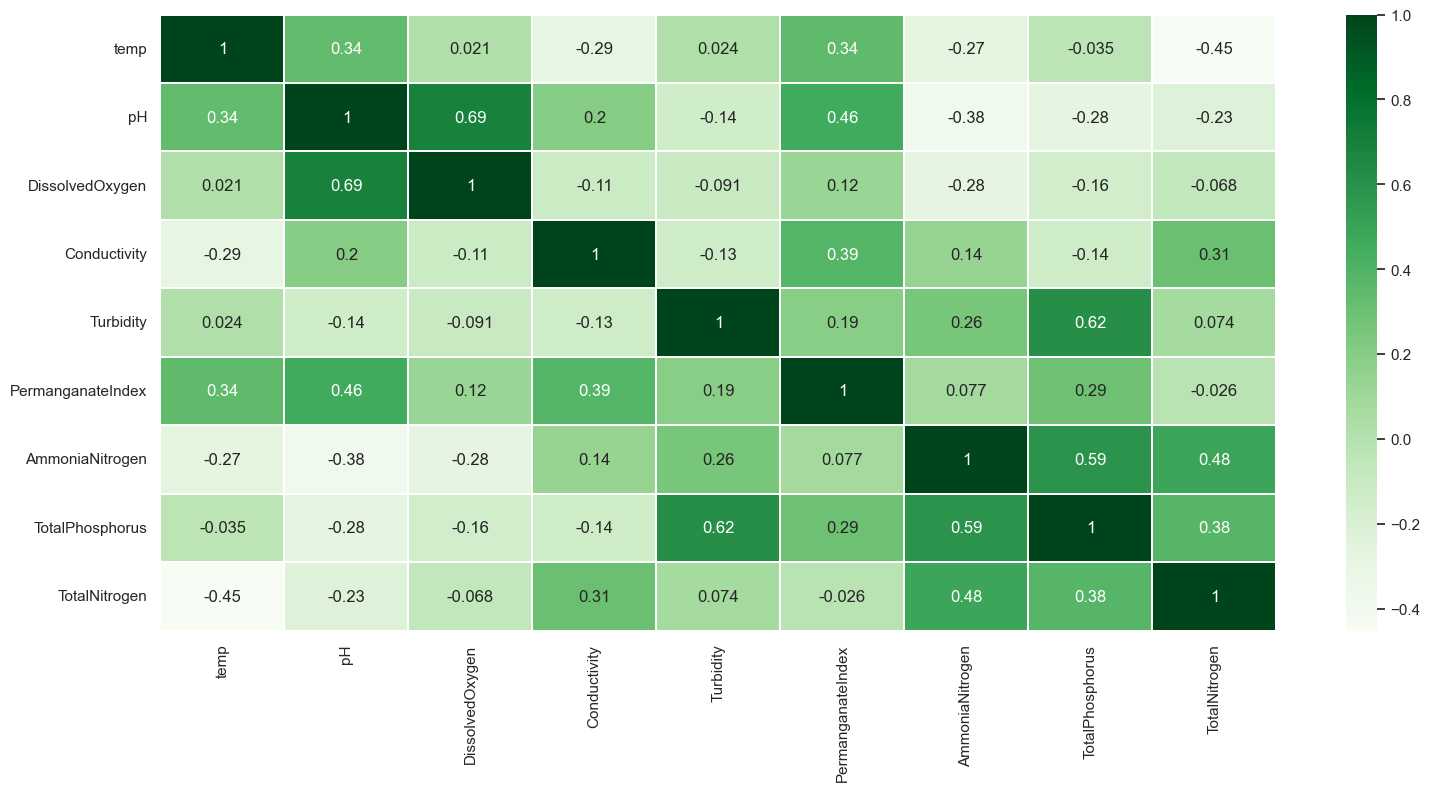

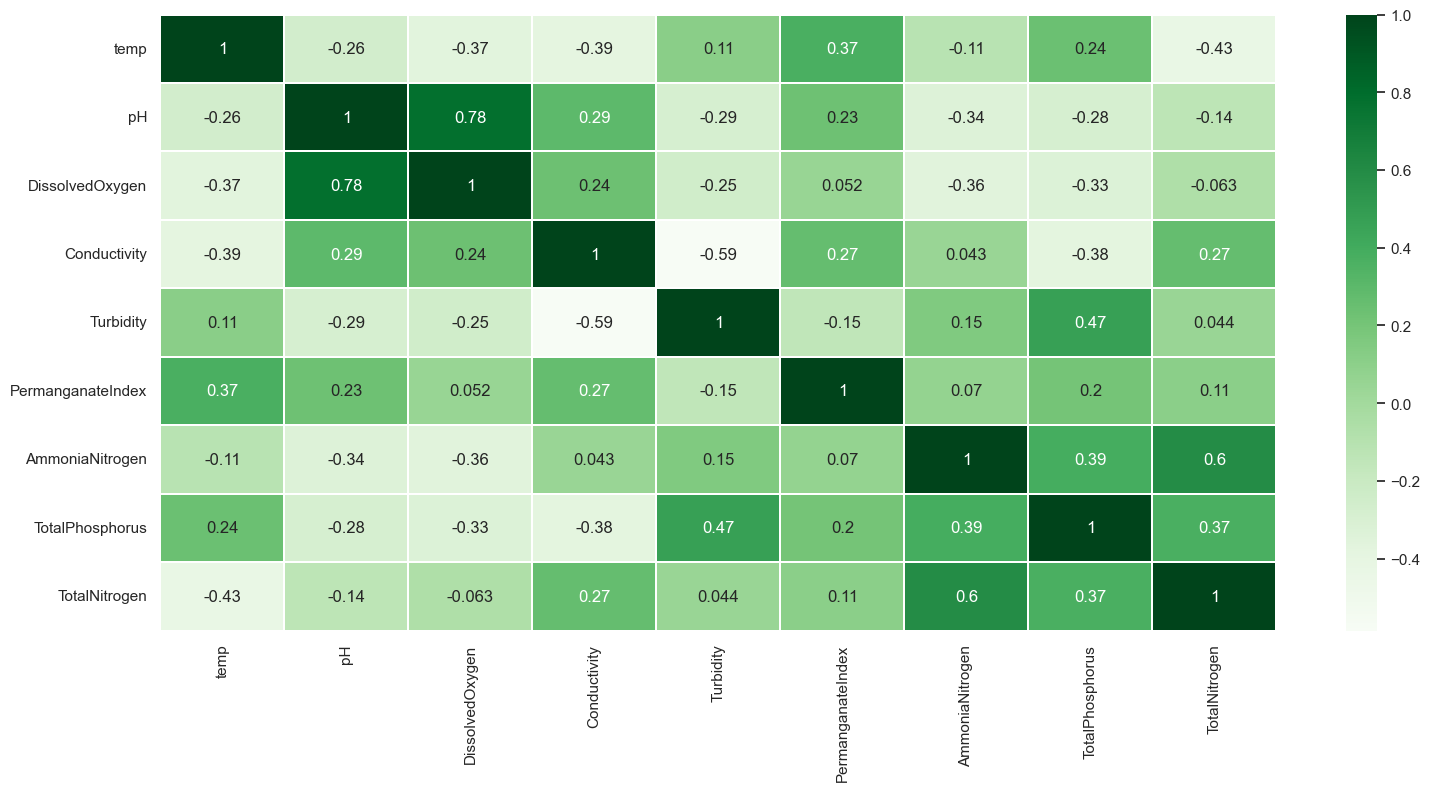

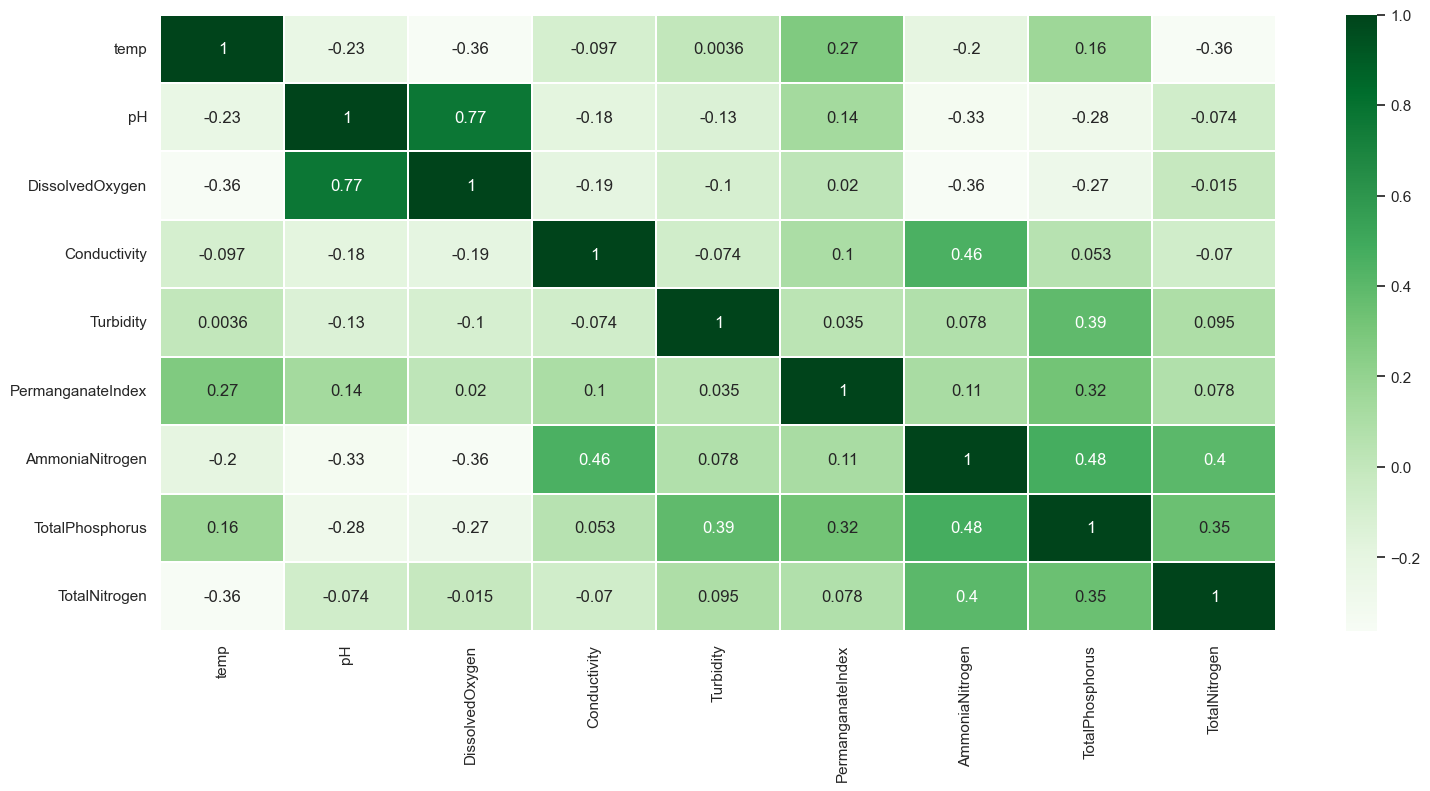

In [106]:
cor_matrix(elborn)
cor_matrix(lescorts)
cor_matrix(poblesec)

### 10 points rolling mean for every base station

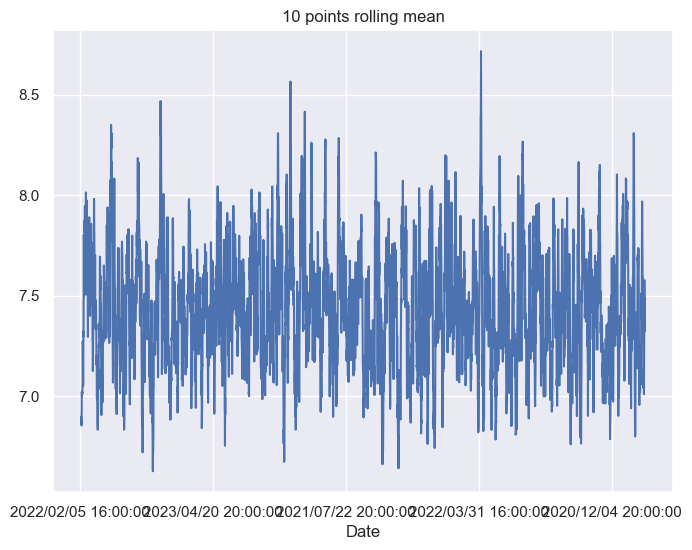

In [107]:
elborn_up_mean = elborn["pH"].rolling(window=10).mean()
plt.ticklabel_format(style='plain')
ax = elborn_up_mean.plot(figsize=(8,6))
ax.set_xlabel("Date")
ax.set_title("10 points rolling mean")
plt.show()

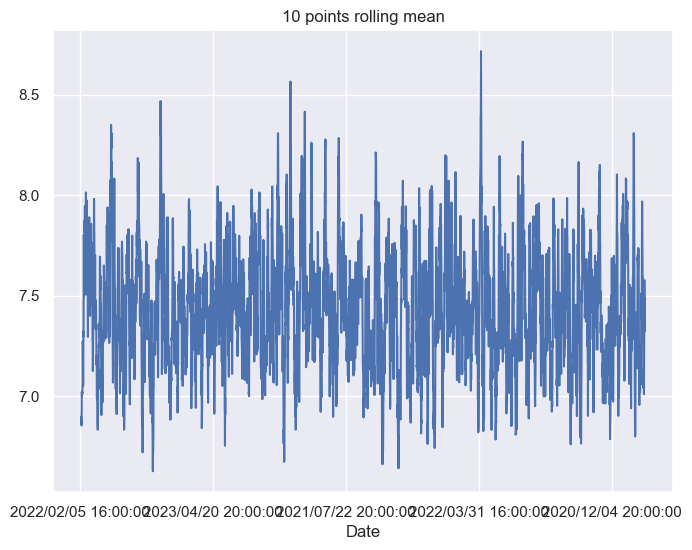

In [108]:
elborn_down_mean = elborn["DissolvedOxygen"].rolling(window=10).mean()
plt.ticklabel_format(style='plain')
ax = elborn_up_mean.plot(figsize=(8,6))
ax.set_xlabel("Date")
ax.set_title("10 points rolling mean")
plt.show()

### Seasonal Box Plot
Boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. We create boxplots for every hour in order to examine how every base station statistically correlates with each other.

In [109]:
def seasonal_box_plot(df, column):
    tmp = copy.deepcopy(df)

    # 检查索引是否为DatetimeIndex，如果不是则进行转换
    if not isinstance(tmp.index, pd.DatetimeIndex):
        try:
            tmp.index = pd.to_datetime(tmp.index)
        except Exception as e:
            raise ValueError("Cannot convert index to DatetimeIndex") from e

    # 添加 day 和 hour 列
    tmp["day"] = tmp.index.dayofyear
    tmp["hour"] = tmp.index.hour
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.ticklabel_format(style='plain')

    # 使用colorcet来生成颜色调色板
    palette = sns.color_palette(cc.glasbey, n_colors=tmp["day"].nunique())

    # 绘制箱线图
    sns.boxplot(x=tmp['hour'], y=tmp[column], palette='coolwarm')
    ax.set_title(f'Seasonal Box Plot for {column}', fontsize=20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Hour', fontsize=16, fontdict=dict(weight='bold'))
    ax.set_ylabel(column, fontsize=16, fontdict=dict(weight='bold'))
    plt.show()
    plt.close()


In [110]:
elborn

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen
time,,,,,,,,,
2022/02/05 16:00:00,16.19,6.92,7.44,218.83,22.18,3.49,0.772,0.1540,4.136
2022/10/22 20:00:00,26.79,7.31,8.06,134.54,8.64,2.45,0.025,0.0320,1.511
2022/01/10 16:00:00,19.86,7.25,7.66,191.94,16.96,3.02,0.032,0.0542,2.820
2022/10/24 12:00:00,27.15,7.19,8.37,134.19,9.84,2.45,0.025,0.0314,1.299
2023/08/31 00:00:00,29.81,6.18,3.86,96.49,19.15,2.73,0.097,0.0974,2.681
...,...,...,...,...,...,...,...,...,...
2022/11/17 08:00:00,26.43,7.29,8.25,139.77,7.45,2.55,0.025,0.0347,1.267
2023/07/27 04:00:00,33.37,9.07,12.54,105.99,7.65,4.18,0.025,0.0683,1.603
2023/08/02 00:00:00,31.77,6.88,5.85,113.33,8.16,3.51,0.025,0.0464,1.641


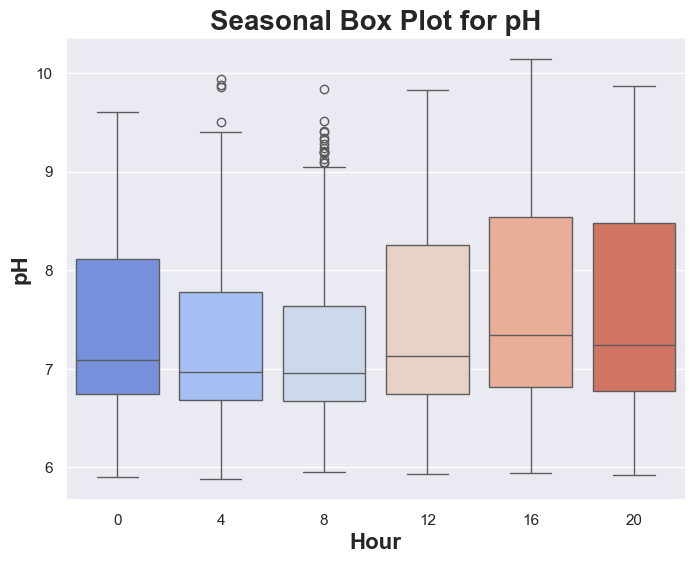

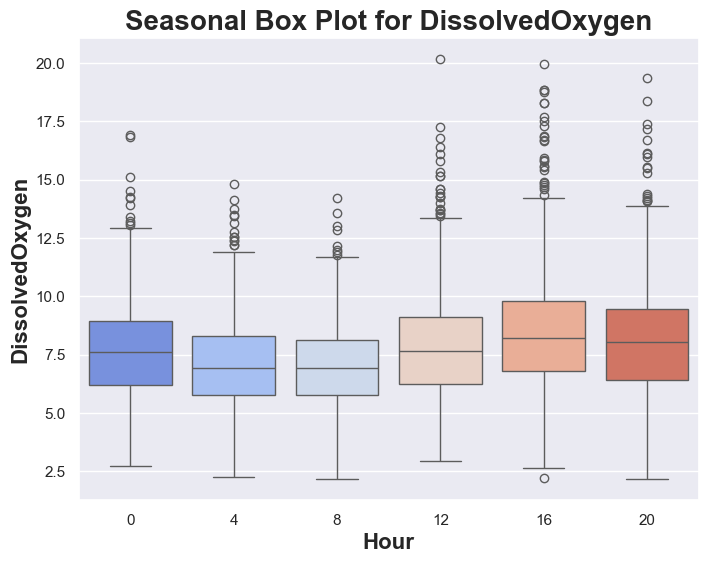

In [111]:
seasonal_box_plot(elborn, "pH")
seasonal_box_plot(elborn, "DissolvedOxygen")

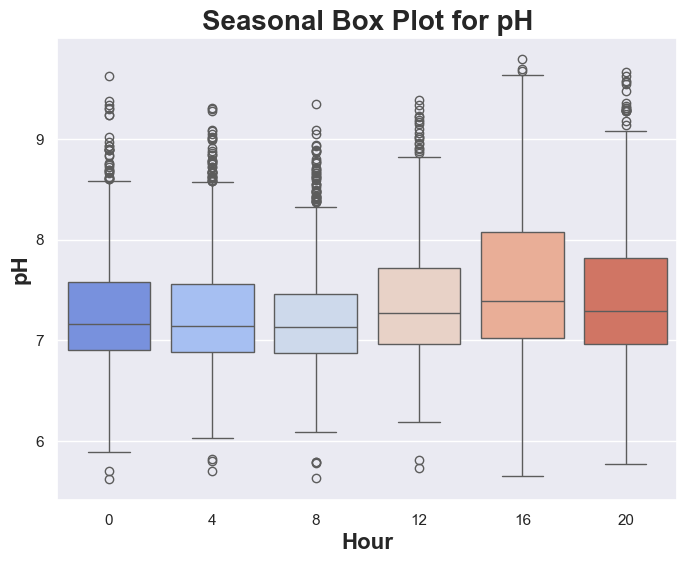

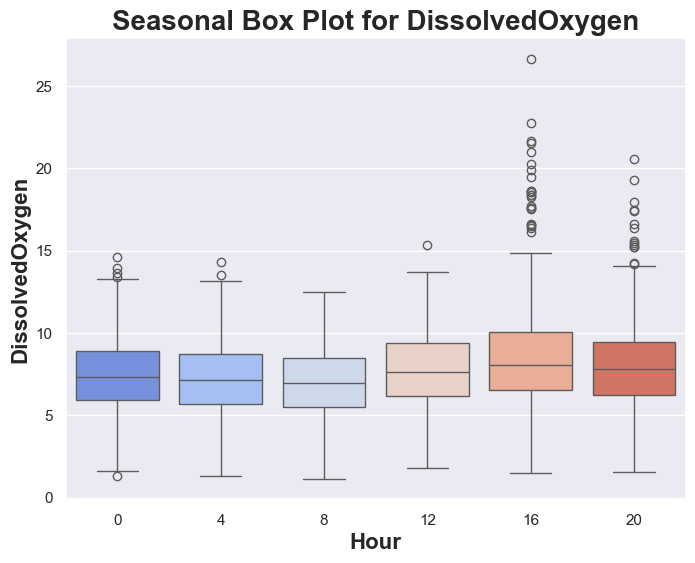

In [112]:
seasonal_box_plot(lescorts, "pH")
seasonal_box_plot(lescorts, "DissolvedOxygen")

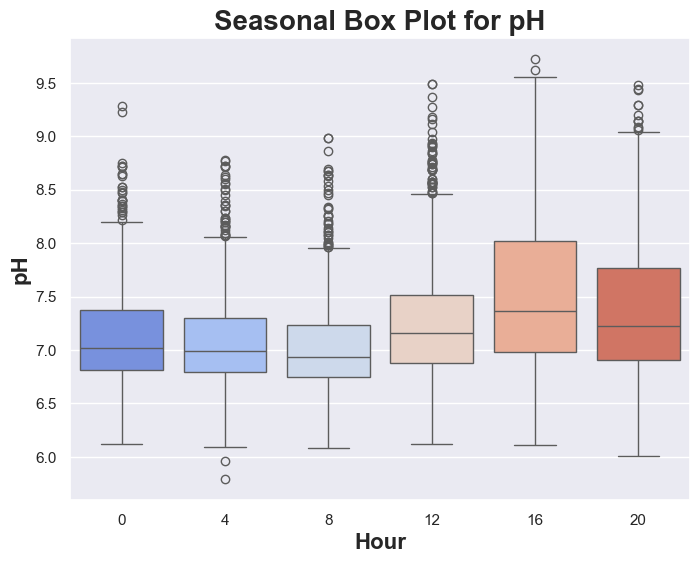

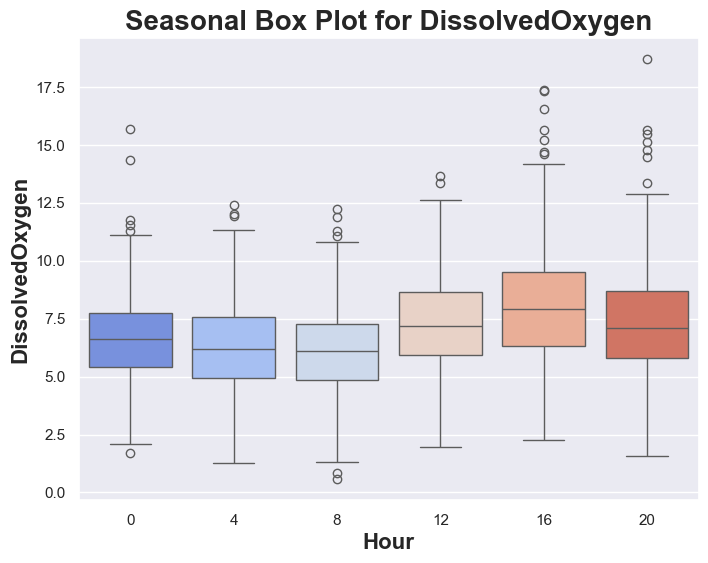

In [113]:
seasonal_box_plot(poblesec, "pH")
seasonal_box_plot(poblesec, "DissolvedOxygen")

### Concatenate datasets from every base station together

In [114]:
elborn["District"] = "ElBorn"
lescorts["District"] = "LesCorts"
poblesec["District"] = "PobleSec"

In [115]:
full_df = pd.concat([elborn, lescorts, poblesec], ignore_index=True)

In [116]:
full_df.groupby(['District']).min()

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen
District,,,,,,,,,
ElBorn,10.56,5.88,2.16,2.22,0.38,1.23,0.025,0.007,0.444
LesCorts,12.70,5.62,1.12,79.11,0.93,-1.00,0.025,-1.000,-1.000
PobleSec,13.46,5.79,0.57,0.28,0.47,-1.00,-1.000,-1.000,-1.000


In [117]:
full_df.groupby(['District']).max()

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen
District,,,,,,,,,
ElBorn,37.06,10.14,20.16,222.45,1741.89,23.39,2.281,1.1479,11.941
LesCorts,35.88,9.79,26.63,278.24,216.62,11.04,2.059,0.5520,5.767
PobleSec,35.87,9.72,18.69,23157.70,330.95,26.48,2.154,0.3740,25.744


In [118]:
full_df.groupby(['District']).mean()

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen
District,,,,,,,,,
ElBorn,26.045606,7.433860,7.724814,149.032026,19.293812,3.921107,0.142481,0.083547,2.168798
LesCorts,26.006505,7.369415,7.648538,179.678673,17.123608,5.399556,0.117692,0.100533,2.081573
PobleSec,26.013343,7.240478,6.942896,1367.091601,20.128724,5.301950,0.167484,0.086616,1.887450


In [119]:
full_df.groupby(['District']).median()

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen
District,,,,,,,,,
ElBorn,26.55,7.11,7.505,150.30,12.47,3.64,0.049,0.0614,2.0650
LesCorts,26.31,7.22,7.520,186.16,12.55,5.37,0.051,0.0870,1.9940
PobleSec,26.45,7.10,6.820,193.90,16.00,5.23,0.093,0.0760,1.7655
